In [85]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import DBSCAN
import umap
import hdbscan
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from read_clustering.variant_call import VariantCalls
threshold = 0.5
np.random.seed(42)

In [86]:
ivt_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/canonical_ivt_round30_alt_canonical_supervised_500_500.model.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_cbf5_gal_round30_alt_canonical_supervised_500_500.model.csv"
native_nop58_gal_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_nop58_gal_round30_alt_canonical_supervised_500_500.model.csv"


In [87]:
file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, 
              native_cbf5_gal_path, native_nop58_gal_path]
labels = ["ivt_path", "cbf5_glu_psu_depletion_path", "nop58_glu_2o_depletion_path",
          "native_cbf5_gal_path", "native_nop58_gal_path"]


In [88]:
vc = VariantCalls(file_paths, labels)


In [89]:
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]

In [90]:
pseduo_u_df = vc.get_positions_of_variant_set(pseudou)
twoprimeo_df = vc.get_positions_of_variant_sets(twoprimeo)
contig = "RDN18-1"


In [70]:
# pseduo_u_df.to_csv("/Users/andrewbailey/CLionProjects/rrna_analysis/reference/misc_pos_files/pseudo_u.positions", index=False)

In [71]:
# twoprimeo_df.to_csv("/Users/andrewbailey/CLionProjects/rrna_analysis/reference/misc_pos_files/twoprime.positions", index=False)

In [91]:
pseduo_u_pos = pseduo_u_df[pseduo_u_df["contig"] == contig]["reference_index"].values
twoprimeo_pos = twoprimeo_df[twoprimeo_df["contig"] == contig]["reference_index"].values
positions = vc.get_contig_positions(contig)
data = vc.data[(vc.data["contig"] == contig) & (vc.data['reference_index'].isin(positions))]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
nop58_glu = X.loc[(slice(None), 'nop58_glu_2o_depletion_path'), :]
cbf5_glu = X.loc[(slice(None), 'cbf5_glu_psu_depletion_path'), :]
native = X.loc[(slice(None), 'native_cbf5_gal_path'), :]
ivt = X.loc[(slice(None), 'ivt_path'), :]


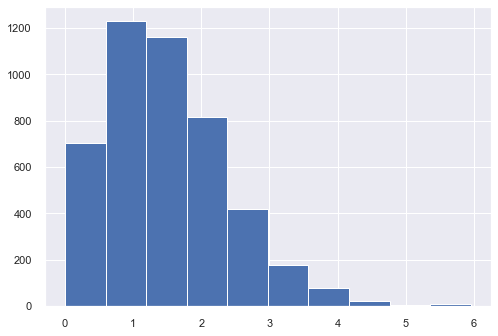

In [92]:
ivt[pseduo_u_pos].sum(axis=1).hist()

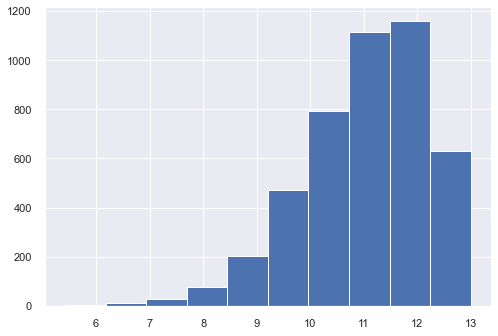

In [73]:
native[pseduo_u_pos].sum(axis=1).hist()

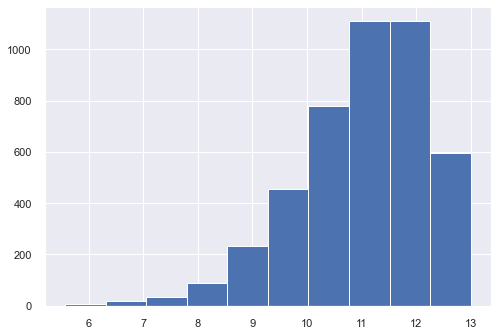

In [74]:
nop58_glu[pseduo_u_pos].sum(axis=1).hist()

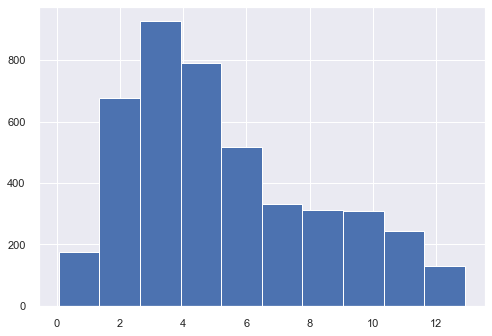

In [75]:
# X.loc[["native_nop58_gal_path"]]
# "nop58_glu_2o_depletion_path"
cbf5_glu[pseduo_u_pos].sum(axis=1).hist()

In [98]:
if contig == "RDN25-1":
    threshold = 17
else:
    threshold = 7

total_pseudoU_prob = cbf5_glu[pseduo_u_pos].sum(axis=1)
high_confidence_depletions = total_pseudoU_prob[total_pseudoU_prob < threshold]
read_ids = high_confidence_depletions.index.get_level_values(0)

In [99]:
out_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/reference/depletion_read_ids/{contig}_cbf5_glu.txt"
pd.DataFrame(read_ids).to_csv(out_path, header=False, index=False)      

In [100]:
print(len(high_confidence_depletions))
print(len(total_pseudoU_prob))

3242
4414


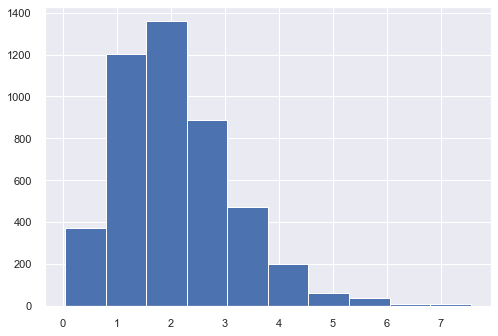

In [101]:
ivt[twoprimeo_pos].sum(axis=1).hist()

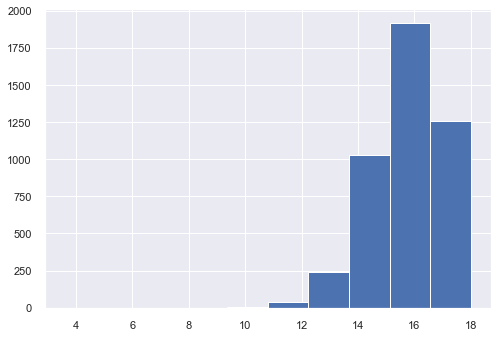

In [102]:
native[twoprimeo_pos].sum(axis=1).hist()

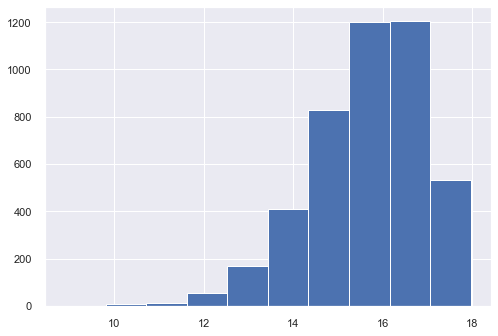

In [103]:
cbf5_glu[twoprimeo_pos].sum(axis=1).hist()

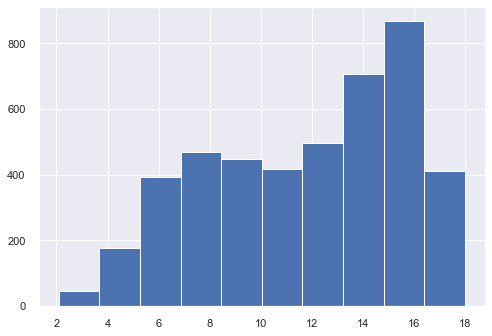

In [104]:
nop58_glu[twoprimeo_pos].sum(axis=1).hist()

In [105]:
if contig == "RDN25-1":
    threshold = 21
else:
    threshold = 10

total_twoprimeo_prob = nop58_glu[twoprimeo_pos].sum(axis=1)
high_confidence_depletions = total_twoprimeo_prob[total_twoprimeo_prob < threshold]
read_ids = high_confidence_depletions.index.get_level_values(0)

In [106]:
print(len(high_confidence_depletions))
print(len(total_twoprimeo_prob))

1515
4431


In [107]:
out_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/reference/depletion_read_ids/{contig}_nop58_glu.txt"
pd.DataFrame(read_ids).to_csv(out_path, header=False, index=False)      